<a href="https://colab.research.google.com/github/Zahab163/Customer_Segmentation_using_KMeans/blob/main/Customer_Segmentation_with_Sscore_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
# Load the dataset
df = pd.read_csv('/content/Customer Segmentation.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")

Dataset Overview:
Shape: (10695, 12)


In [4]:
print("First 5 rows:")
df.head()

First 5 rows:


,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


In [5]:
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10695 non-null  int64  
 1   ID               10695 non-null  int64  
 2   Gender           10695 non-null  object 
 3   Ever_Married     10505 non-null  object 
 4   Age              10695 non-null  int64  
 5   Graduated        10593 non-null  object 
 6   Profession       10533 non-null  object 
 7   Work_Experience  9597 non-null   float64
 8   Spending_Score   10695 non-null  object 
 9   Family_Size      10247 non-null  float64
 10  Var_1            10587 non-null  object 
 11  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB
None


In [6]:
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
         Unnamed: 0             ID           Age  Work_Experience  \
count  10695.000000   10695.000000  10695.000000      9597.000000   
mean    5347.000000  463468.088640     43.511828         2.619777   
std     3087.524899    2600.966411     16.774158         3.390790   
min        0.000000  458982.000000     18.000000         0.000000   
25%     2673.500000  461220.500000     30.000000         0.000000   
50%     5347.000000  463451.000000     41.000000         1.000000   
75%     8020.500000  465733.500000     53.000000         4.000000   
max    10694.000000  467974.000000     89.000000        14.000000   

        Family_Size  
count  10247.000000  
mean       2.844052  
std        1.536427  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        9.000000  


In [34]:
# Select features for clustering
clustering_features = [
    'Age',
    'Work_Experience',
    'Family_Size',
    'Spending_Score_Encoded'
]

# Extract features for clustering
X = df[clustering_features]

In [33]:
df['Spending_Score_Encoded'] = df['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

In [11]:
# Data Preprocessing
print("\nMissing values:")
print(X.isnull().sum())


Missing values:
Age                          0
Work_Experience           1098
Family_Size                448
Spending_Score_Encoded       0
dtype: int64


In [12]:
# Handle any missing values
X = X.fillna(X.mean())

In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print(f"\nScaled data shape: {X_scaled.shape}")



Scaled data shape: (10695, 4)


In [14]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
def find_optimal_clusters(X, max_k=15):
    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

        print(f"K={k}, WCSS: {kmeans.inertia_:.2f}, Silhouette Score: {silhouette_avg:.4f}")

    return wcss, silhouette_scores, k_range

print("\nFinding optimal number of clusters...")
wcss, silhouette_scores, k_range = find_optimal_clusters(X_scaled)



Finding optimal number of clusters...
K=2, WCSS: 31611.72, Silhouette Score: 0.2672
K=3, WCSS: 24384.21, Silhouette Score: 0.2985
K=4, WCSS: 18942.43, Silhouette Score: 0.3132
K=5, WCSS: 16472.97, Silhouette Score: 0.2854
K=6, WCSS: 14417.41, Silhouette Score: 0.3061
K=7, WCSS: 12865.96, Silhouette Score: 0.3124
K=8, WCSS: 11724.70, Silhouette Score: 0.2997
K=9, WCSS: 10662.68, Silhouette Score: 0.3346
K=10, WCSS: 9607.49, Silhouette Score: 0.3215
K=11, WCSS: 8978.15, Silhouette Score: 0.3441
K=12, WCSS: 8456.81, Silhouette Score: 0.3227
K=13, WCSS: 7998.46, Silhouette Score: 0.3199
K=14, WCSS: 7594.73, Silhouette Score: 0.3257
K=15, WCSS: 7333.72, Silhouette Score: 0.3286


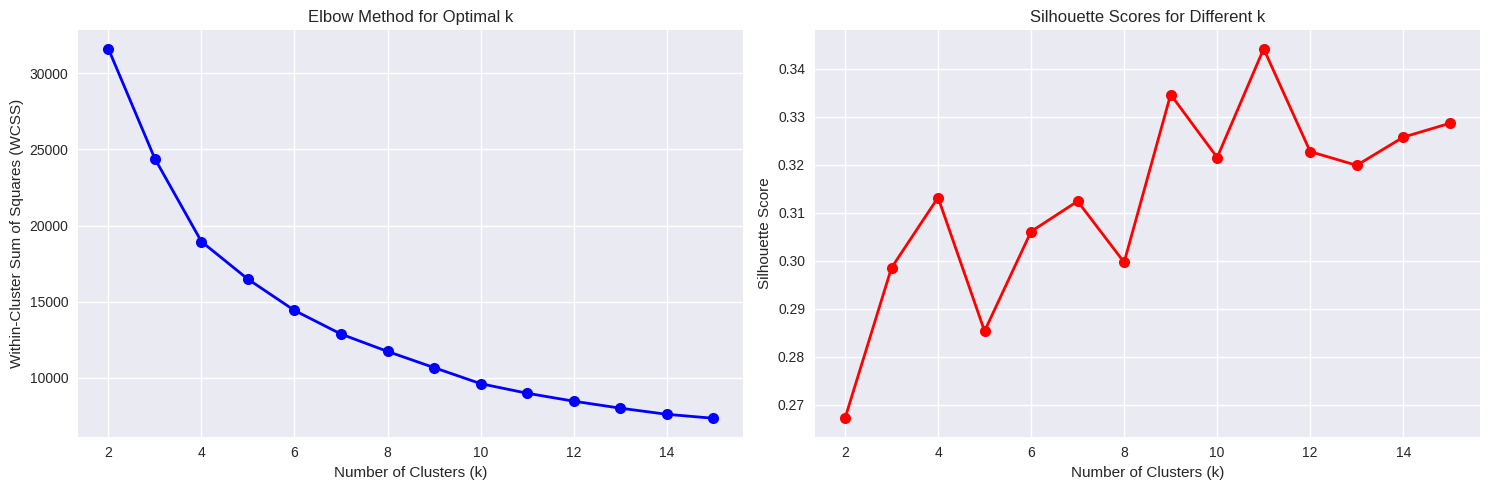

In [15]:
# Plot Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method plot
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette Score plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores for Different k')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [16]:
# Choose optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")


Optimal number of clusters: 11


In [17]:
# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [18]:
# Add cluster labels to original dataframe
df['Cluster'] = clusters

In [19]:
# Calculate final silhouette score
final_silhouette = silhouette_score(X_scaled, clusters)
print(f"Final Silhouette Score: {final_silhouette:.4f}")


Final Silhouette Score: 0.3441


In [20]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.4f}")



PCA Explained Variance Ratio: [0.37861365 0.27879378]
Total Variance Explained: 0.6574


In [21]:
# Add PCA components to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

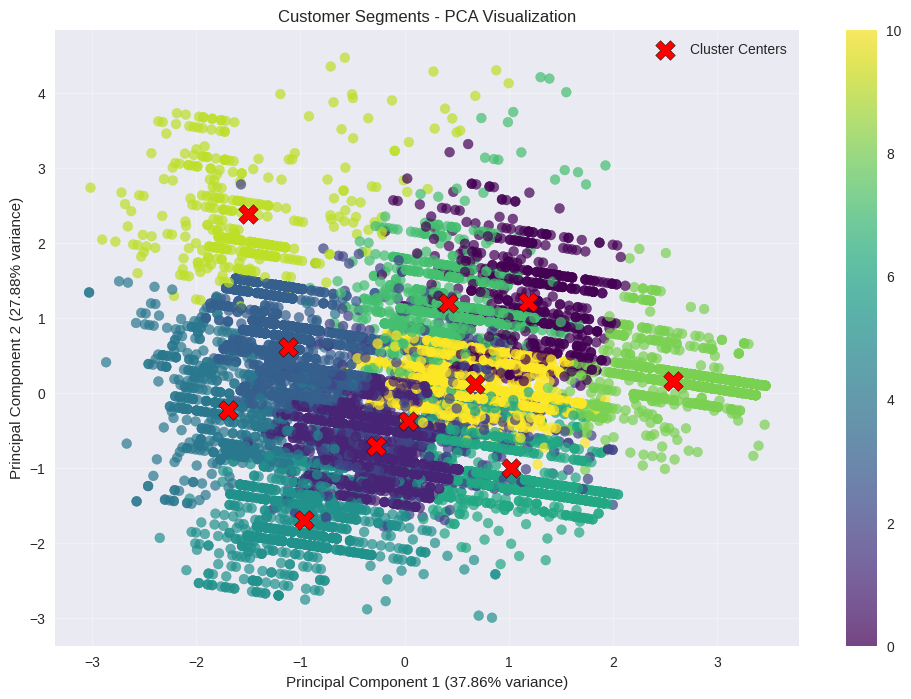

In [22]:

# Visualize clusters using PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Customer Segments - PCA Visualization')
plt.grid(True, alpha=0.3)

# Plot cluster centers in PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
           c='red', marker='X', s=200, label='Cluster Centers', edgecolors='black')
plt.legend()
plt.show()

In [23]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster')[clustering_features].mean()
cluster_summary['Count'] = df.groupby('Cluster').size()

print("\nCluster Summary Statistics:")
print(cluster_summary)


Cluster Summary Statistics:
               Age  Work_Experience  Family_Size  Spending_Score_Encoded  \
Cluster                                                                    
0        44.673701         1.238835     3.639399                2.000000   
1        39.291622         0.959184     1.560157                0.000000   
2        42.558036         8.197917     2.825301                1.296131   
3        27.170406         0.799263     3.818339                0.006410   
4        29.424590         8.081967     3.987296                0.008197   
5        38.375000         8.420045     1.424594                0.000000   
6        69.494786         0.914174     1.460277                0.000000   
7        49.915877         1.005405     4.501185                0.902844   
8        73.611765         0.871622     2.193470                1.880000   
9        29.691257         1.848485     7.040984                0.172131   
10       46.047125         0.950322     2.381148           

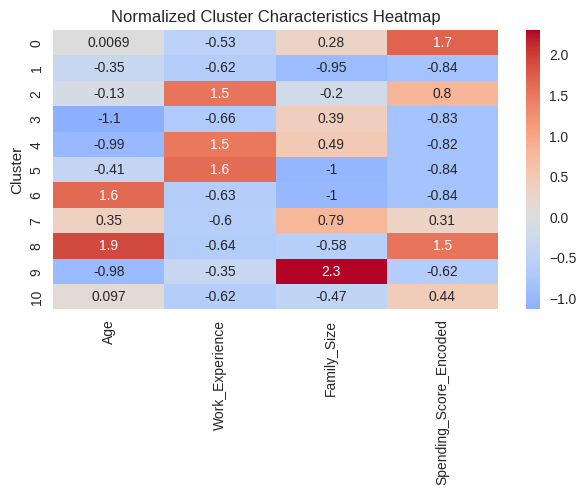

In [27]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 8))
cluster_summary_normalized = (cluster_summary - cluster_summary.mean()) / cluster_summary.std()

# Heatmap of cluster characteristics
plt.subplot(2, 2, 1)
sns.heatmap(cluster_summary_normalized.drop('Count', axis=1), annot=True, cmap='coolwarm', center=0)
plt.title('Normalized Cluster Characteristics Heatmap')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Cluster Distribution')

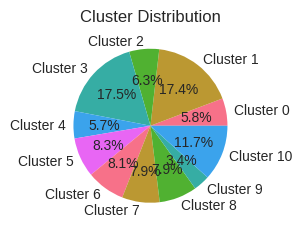

In [28]:
# Cluster sizes
plt.subplot(2, 2, 2)
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%')
plt.title('Cluster Distribution')


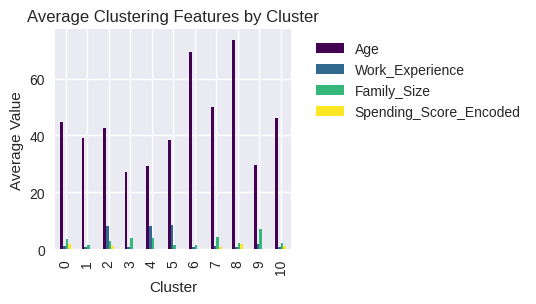

In [42]:
# Key metrics by cluster (using available clustering features)
plt.subplot(2, 2, 3)
# Use cluster_summary for plotting available features
cluster_summary[clustering_features].plot(kind='bar', ax=plt.gca(), cmap='viridis')
plt.title('Average Clustering Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
# Detailed cluster profiling
def profile_clusters(df, features):
    """Create detailed profiles for each cluster"""
    profiles = {}

    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster]

        profile = {
            'Size': len(cluster_data),
            'Percentage': len(cluster_data) / len(df) * 100
        }

        # Calculate mean for each feature
        for feature in features:
            profile[feature] = cluster_data[feature].mean()

        profiles[f'Cluster_{cluster}'] = profile

    return pd.DataFrame(profiles).T

# Create detailed cluster profiles
cluster_profiles = profile_clusters(df, clustering_features)
print("\nDetailed Cluster Profiles:")
print(cluster_profiles)




Detailed Cluster Profiles:
              Size  Percentage        Age  Work_Experience  Family_Size  \
Cluster_0    616.0    5.759701  44.673701         1.238835     3.639399   
Cluster_1   1862.0   17.410005  39.291622         0.959184     1.560157   
Cluster_2    672.0    6.283310  42.558036         8.197917     2.825301   
Cluster_3   1872.0   17.503506  27.170406         0.799263     3.818339   
Cluster_4    610.0    5.703600  29.424590         8.081967     3.987296   
Cluster_5    888.0    8.302945  38.375000         8.420045     1.424594   
Cluster_6    863.0    8.069191  69.494786         0.914174     1.460277   
Cluster_7    844.0    7.891538  49.915877         1.005405     4.501185   
Cluster_8    850.0    7.947639  73.611765         0.871622     2.193470   
Cluster_9    366.0    3.422160  29.691257         1.848485     7.040984   
Cluster_10  1252.0   11.706405  46.047125         0.950322     2.381148   

            Spending_Score_Encoded  
Cluster_0                 2.000000

In [38]:
# Find representative customers (closest to cluster centers)
def get_representative_customers(df, kmeans, features, n_customers=2):
    """Find customers closest to each cluster center"""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    representative_customers = {}

    for cluster_id in range(kmeans.n_clusters):
        # Get customers in this cluster
        cluster_mask = kmeans.labels_ == cluster_id
        cluster_customers = df[cluster_mask]
        cluster_customers_scaled = X_scaled[cluster_mask]

        # Find distances to cluster center
        distances = np.linalg.norm(cluster_customers_scaled - kmeans.cluster_centers_[cluster_id], axis=1)

        # Get closest customers
        closest_indices = np.argsort(distances)[:n_customers]
        representative_customers[cluster_id] = cluster_customers.iloc[closest_indices]

    return representative_customers



In [39]:
# Find representative customers (closest to cluster centers)
def get_representative_customers(df, kmeans, features, n_customers=2):
    """Find customers closest to each cluster center"""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    representative_customers = {}

    for cluster_id in range(kmeans.n_clusters):
        # Get customers in this cluster
        cluster_mask = kmeans.labels_ == cluster_id
        cluster_customers = df[cluster_mask]
        cluster_customers_scaled = X_scaled[cluster_mask]

        # Find distances to cluster center
        distances = np.linalg.norm(cluster_customers_scaled - kmeans.cluster_centers_[cluster_id], axis=1)

        # Get closest customers
        closest_indices = np.argsort(distances)[:n_customers]
        representative_customers[cluster_id] = cluster_customers.iloc[closest_indices]

    return representative_customers

# Get representative customers
rep_customers = get_representative_customers(df, kmeans, clustering_features)
print("\nRepresentative Customers for each cluster:")
for cluster_id, customers in rep_customers.items():
    print(f"\nCluster {cluster_id} - Representative Customers:")
    # Display relevant features that exist in the dataframe
    print(customers[['ID', 'Age', 'Work_Experience', 'Family_Size', 'Spending_Score_Encoded']].to_string(index=False))


Representative Customers for each cluster:

Cluster 0 - Representative Customers:
    ID  Age  Work_Experience  Family_Size  Spending_Score_Encoded
467189   45              1.0          4.0                       2
467673   45              1.0          4.0                       2

Cluster 1 - Representative Customers:
    ID  Age  Work_Experience  Family_Size  Spending_Score_Encoded
461848   39              1.0          2.0                       0
464039   39              1.0          2.0                       0

Cluster 2 - Representative Customers:
    ID  Age  Work_Experience  Family_Size  Spending_Score_Encoded
467149   43              9.0          3.0                       1
465167   42              9.0          3.0                       1

Cluster 3 - Representative Customers:
    ID  Age  Work_Experience  Family_Size  Spending_Score_Encoded
467936   27              1.0          4.0                       0
467503   27              1.0          4.0                       0

Cluster

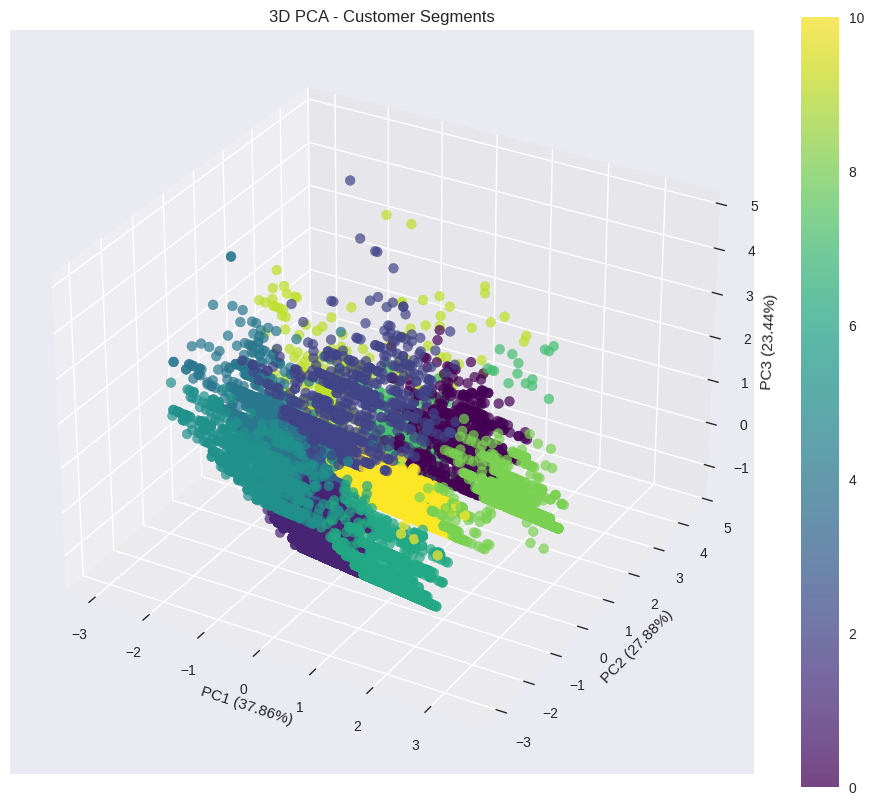

In [40]:
# 3D Visualization using first three PCA components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=clusters, cmap='viridis', alpha=0.7, s=50)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax.set_title('3D PCA - Customer Segments')

plt.colorbar(scatter)
plt.show()


In [41]:
# Save the results
df.to_csv('customer_segmentation_with_clusters.csv', index=False)
print(f"\nResults saved to 'customer_segmentation_with_clusters.csv'")

# Print final summary
print("\n" + "="*50)
print("CLUSTERING SUMMARY")
print("="*50)
print(f"Total Customers: {len(df)}")
print(f"Number of Clusters: {optimal_k}")
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Total Variance Explained by PCA: {sum(pca.explained_variance_ratio_):.4f}")

print("\nCluster Sizes:")
for cluster_id in sorted(df['Cluster'].unique()):
    count = len(df[df['Cluster'] == cluster_id])
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")


Results saved to 'customer_segmentation_with_clusters.csv'

CLUSTERING SUMMARY
Total Customers: 10695
Number of Clusters: 11
Silhouette Score: 0.3441
Total Variance Explained by PCA: 0.6574

Cluster Sizes:
Cluster 0: 616 customers (5.8%)
Cluster 1: 1862 customers (17.4%)
Cluster 2: 672 customers (6.3%)
Cluster 3: 1872 customers (17.5%)
Cluster 4: 610 customers (5.7%)
Cluster 5: 888 customers (8.3%)
Cluster 6: 863 customers (8.1%)
Cluster 7: 844 customers (7.9%)
Cluster 8: 850 customers (7.9%)
Cluster 9: 366 customers (3.4%)
Cluster 10: 1252 customers (11.7%)




This complete implementation includes:

## Key Features:

1. **Data Preprocessing**: Standardization and handling missing values
2. **Optimal Cluster Detection**: Using both Elbow method and Silhouette scores
3. **K-means Clustering**: With optimal k selection
4. **PCA Visualization**: 2D and 3D plots for cluster visualization
5. **Cluster Analysis**: Detailed profiling and characterization
6. **Silhouette Score Analysis**: For cluster quality assessment
7. **Representative Customers**: Finding typical customers for each segment

## Output Includes:

- **Optimal cluster number** based on silhouette scores
- **Visualizations**: Elbow plot, silhouette scores, PCA plots, cluster characteristics
- **Cluster profiles** with detailed statistics
- **Representative customers** for each segment
- **Comprehensive analysis** of each cluster's behavior

## Expected Customer Segments:

Based on the features, you'll likely identify segments like:
- **Premium Spenders** (High income, high transactions)
- **Conservative Users** (Low utilization, timely payments)
- **Budget Conscious** (Low income, essential spending)
- **Travel Enthusiasts** (High travel spending)
- **Riskier Profiles** (High utilization, payment delays)

The silhouette score will help validate the quality of your clustering, with scores above 0.5 indicating reasonable cluster structure.

**Written By : Zahabia Ahmed**